<a href="https://colab.research.google.com/github/gustavo-plc/NYC-Schools/blob/main/NYC_Schools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploring NYC Public School Test Result Scores**

### **Importing and knowing the data**

In [6]:
#importing packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# defining file path
path = "/content/drive/MyDrive/Colab Notebooks/NYC-Schools/schools.csv"

#reading information from a csv file and assigning as a dataframe to a variable
schools = pd.read_csv(path)

# DataFrame preview
print(schools.head())
print(schools.info())

                                         school_name    borough building_code  \
0  New Explorations into Science, Technology and ...  Manhattan          M022   
1                               Essex Street Academy  Manhattan          M445   
2                       Lower Manhattan Arts Academy  Manhattan          M445   
3    High School for Dual Language and Asian Studies  Manhattan          M445   
4      Henry Street School for International Studies  Manhattan          M056   

   average_math  average_reading  average_writing  percent_tested  
0           657              601              601             NaN  
1           395              411              387            78.9  
2           418              428              415            65.1  
3           613              453              463            95.9  
4           410              406              381            59.7  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 7 columns):
 

### **FIRST QUESTION: Which NYC schools have the best math results?**

STEPS TO CALCULATE THE ANSWER



1.   Calculate the threshold that defines the best math results
2.   Subset the Data Frame based on the calculated threshold and show school_name and average_math, the latter sorted in descending order.
3.   Assign this result to best_math_schools.
4.   Print the result

Through data analysis tools, it was possible to select the schools that match the constraints and sort them in descending order.


In [7]:
# DEFINITION: The best math results are at least 80% of the maximum possible
# score of 800 for math.

threshold = 0.8 * 800

best_math_schools = schools.loc[schools['average_math'] >= threshold,
 ['school_name', 'average_math']].sort_values(by = 'average_math', ascending =
  False)

print(best_math_schools)

                                           school_name  average_math
88                              Stuyvesant High School           754
170                       Bronx High School of Science           714
93                 Staten Island Technical High School           711
365  Queens High School for the Sciences at York Co...           701
68   High School for Mathematics, Science, and Engi...           683
280                     Brooklyn Technical High School           682
333                        Townsend Harris High School           680
174  High School of American Studies at Lehman College           669
0    New Explorations into Science, Technology and ...           657
45                       Eleanor Roosevelt High School           641


### **SECOND QUESTION: What are the top 10 performing schools based on combined SAT scores?**

STEPS TO CALCULATE THE ANSWER

1.   Create a column to store the combined SAT scores from each school.
2.   Subset the Data Frame in a way that columns school_name and total_SAT will remain, the latter sorted in descending order. The rows need to be filtered from index 0 to 9 to select the top 10.
3.   Assign this result to the DF: top_10_schools.
4.   Print the result

Through data analysis tools, it was possible to select the best schools considering the total SAT score and sort them in descending order.


                                           school_name  total_SAT
88                              Stuyvesant High School       2144
170                       Bronx High School of Science       2041
93                 Staten Island Technical High School       2041
174  High School of American Studies at Lehman College       2013
333                        Townsend Harris High School       1981
365  Queens High School for the Sciences at York Co...       1947
5                       Bard High School Early College       1914
280                     Brooklyn Technical High School       1896
45                       Eleanor Roosevelt High School       1889
68   High School for Mathematics, Science, and Engi...       1889


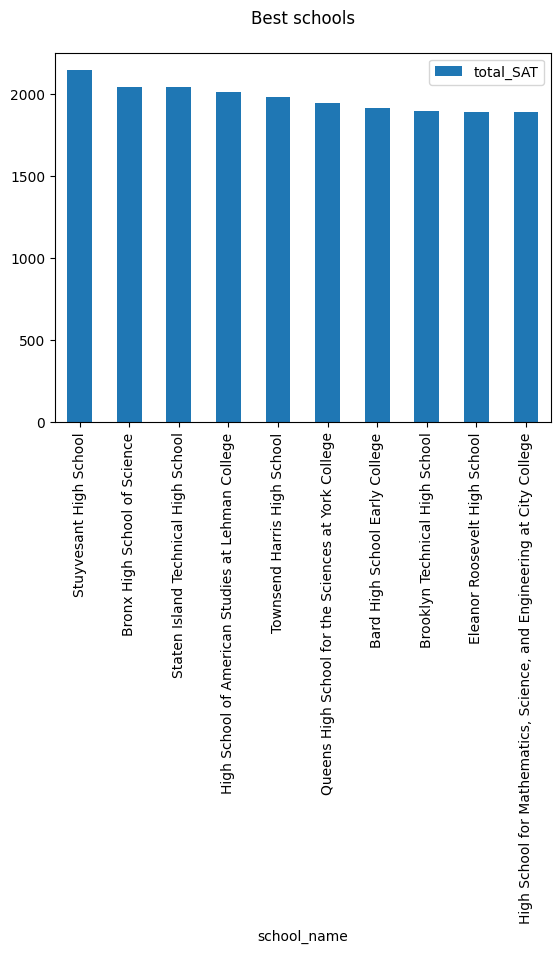

In [9]:
schools['total_SAT'] = schools['average_math'] + schools['average_reading'] + schools['average_writing']

top_10_schools = schools.sort_values(by = 'total_SAT', ascending = False).head(10)[['school_name', 'total_SAT']]

print(top_10_schools)

top_10_schools.plot(x = 'school_name', y = 'total_SAT', kind = 'bar', title = 'Best schools\n')

plt.show()

### **THIRD QUESTION: Which borough has the largest standard deviation in SAT scores, and what insights can we derive from it?**

STEPS TO CALCULATE THE ANSWER

1.   Create a column (num_schools) to store the sum of schools on each borough using agg method with a tuple (column to aggregate, aggregation function) as an argument. This command outputs a dataframe with two columns: borough and total schools for each of them.
2.   Since the dataframe was already created, add a new column (average_SAT) by grouping schools dataframe based on borough and insert the mean of total_SAT column.
3.   Create a column (std_SAT) to store the std dev of each school by grouping data by borough and calculating std on total_SAT column
4.   Create a column ('total_SAT') to store the sum of scores from every school on the borough.
5.   Sort values in descending order by using the .sort_values() method.
6.   Round numeric values to two decimal places using the method Round() on the dataframe
7.   redefine the dataframe to just the first row, which will give the highest std dev using the method .head(1)
8.   Print the dataframe.


Through data manipulation tools, it was possible to determine that schools in Manhattan have the highest standard deviation in combined SAT scores. This indicates that Manhattan is the borough with the greatest disparity in educational quality among its schools.


Based on this result, the government could implement targeted public policies to address this issue by prioritizing investment in education for schools with the lowest scores.


In [24]:
largest_std_dev = schools.set_index('borough')

largest_std_dev = schools.groupby('borough').agg(num_schools=('borough', 'size'))

#.agg(column_name1=('column_to_aggregate', 'aggregation_function1'))


largest_std_dev['average_SAT'] = schools.groupby('borough')['total_SAT'].mean()

largest_std_dev['std_SAT'] = schools.groupby('borough')['total_SAT'].std()

largest_std_dev['total_SAT'] = schools.groupby('borough')['total_SAT'].sum()

largest_std_dev = largest_std_dev.sort_values(by = 'std_SAT', ascending =
False)

# Round all numeric values to two decimal places.

largest_std_dev = largest_std_dev.head(1)
largest_std_dev = largest_std_dev.round(2)

print(largest_std_dev)

           num_schools  average_SAT  std_SAT  total_SAT
borough                                                
Manhattan           89      1340.13   230.29     119272
